<a href="https://colab.research.google.com/github/thaiinaaalves/III_introdu-o_bilibiotecas_visulizacao/blob/main/III_introdu%C3%A7%C3%A3o_bilibiotecas_visulizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 5 - 01/11/2024 - Introdução a bilibiotecas de vizualização do Python

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#um conjunto de dados no Seaborn
tips=sns.load_dataset("tips")

In [ ]:
#configurar tipo de gráfico (Estilo)
sns.set_style("whitegrid")

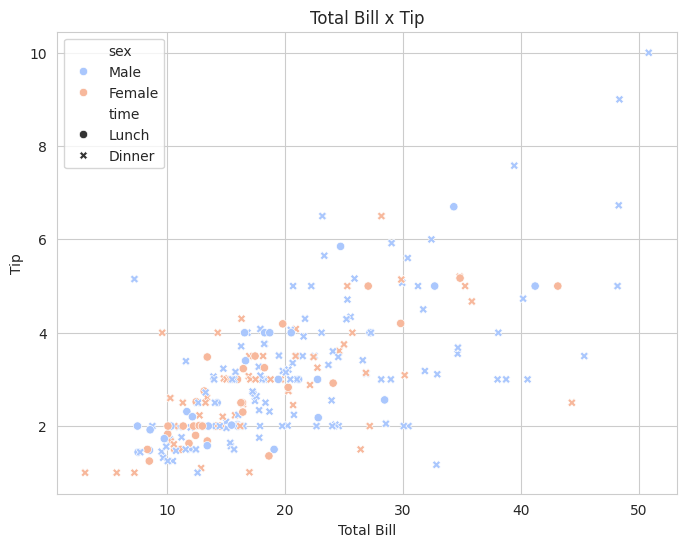

In [ ]:
#criando o tipo de gráfico Parte 2
plt.figure(figsize=(8,6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue='sex', style='time', palette='coolwarm')
#adicionar rótulos
plt.title('Total Bill x Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

Exercício

In [ ]:
'''Você é um analista de dados contratado por um restaurante que deseja entender melhor os hábitos de consumo dos clientes para otimizar o atendimento
e promover ofertas específicas. O restaurante coleta dados sobre:
Valor total da conta (total_bill)
Gorjeta (tip)
Sexo do cliente (sex)
Dia da semana (day)
Horário (time: almoço ou jantar)
Quantidade de pessoas na mesa (size)

O restaurante quer descobrir:Qual é o comportamento de gorjetas entre homens e mulheres em diferentes dias da semana.Como o valor da conta total
varia em diferentes horários e dias. Qual é a relação entre o tamanho da mesa e o valor da conta.
Para realizar essas análises, use o conjunto de dados tips do Seaborn, que simula esses dados de um restaurante.Tarefas:

Comparação de Gorjetas entre Gêneros e Dias da Semana:
Crie um gráfico boxplot que mostre a distribuição das gorjetas (tip) por dia da semana (day) e diferencie por gênero (sex).
Comente o resultado. Você observa alguma diferença significativa entre homens e mulheres em relação às gorjetas?

Crie um gráfico violin plot que mostre a distribuição do valor total da conta (total_bill) por horário (time) e dia da semana (day).
Explique suas observações. Existe alguma diferença notável no valor das contas entre almoço e jantar?
Existe uma correlação entre o tamanho da mesa e o valor da conta?'''

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#criando o dataset
tips = sns.load_dataset("tips")
sns.set(style="whitegrid")

In [ ]:
#1.Comparação de Gorjetas entre Gêneros e Dias da Semana
plt.figure(figsize=(10, 6))
sns.boxplot(data=tips, x="day", y="tip", hue="sex", palette="Set2")
plt.title("Distribuição de Gorjetas por Dia e Gênero")
plt.xlabel("Dia da Semana")
plt.ylabel("Gorjeta")
plt.show()

In [ ]:
'''Com base nos dados é possivel notar que as quintas-feiras os homens costumam dar mais gorjetas que as mulheres de forma significativa, já na
sexta-feira e sábado os gêneros se equiparam. E no domingo vemos um aumento significativo no valor das gorjetas tanto para homens quanto para mulheres.'''

In [ ]:
#2.Comparação entre o valor da conta por horaário e dia da semana
plt.figure(figsize=(10, 6))
sns.violinplot(data=tips, x="day", y="total_bill", hue="time", palette="Set2")
plt.title("Distribuição Conta por Horário/Dia")
plt.xlabel("Dia da Semana")
plt.ylabel("Horário")
plt.show()

In [ ]:
'''É possivel notar que as quintas-feiras o maior fluxo ocorre no horário de almoço. E de sexta-feira até domingo o maior fluxo ocorre no horário
do jantar.'''

In [ ]:
#3. Comparação do tamanho da mesa entre o valor da conta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tips, x="size", y="total_bill", hue="size", palette="Set2")
plt.title("Distribuição de Tamanho da Mesa/Conta")
plt.xlabel("Tamanho da Mesa")
plt.ylabel("Total da Conta")
plt.show()

In [ ]:
'''Pode-se notar que quanto maior o tamanho da mesa maior o valor da conta.'''

Aula 6 - 04/11/2024 - Continuação

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

In [ ]:
#1.Resolvendo uma Equação Diferencial com SciPy
#vamos resolver a equação diferencial y' = -2 * y com y(0) = 1

#definindo a função que representa a derivada de y em relação a t
def dydt(t, y):
    return -2 * y

In [ ]:
#condição inicial
y0= [1] # Inicial Y
t_span = (0, 5)

solution = solve_ivp(dydt, t_span, y0, t_eval=np.linspace(0, 5, 100))

plt.plot(solution.t, solution.y[0], label="y(t)")
plt.xlabel("Tempo t")
plt.ylabel("y(t)")
plt.title("Solução da Equação Diferencial y' = -2 * y")
plt.legend()
plt.show()

In [ ]:
#encontrar o mínimo da função f(x)
def f(x):
    return (x - 3) ** 2 + 4

In [ ]:
#ponto inicial para o algoritmo de otimização
x0 = [0]

#usando o método 'BFGS' para encontrar o mínimo
result = minimize(f, x0, method='BFGS')

print("Valor mínimo de f(x):", result.fun)
print("Valor de x que minimiza f(x):", result.x)

In [ ]:
#1.importando bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

#ajuste de Curva (Curve Fitting)
#gerando dados simulados com ruído
np.random.seed(0)
x_data = np.linspace(0, 4, 50)
y_data = 3 * np.exp(-1.5 * x_data) + np.random.normal(0, 0.2, x_data.size)

#definindo a função exponencial para ajuste
def exponential_func(x, a, b):
    return a * np.exp(b * x)

#ajustando a curva aos dados
params, covariance = curve_fit(exponential_func, x_data, y_data, p0=[2, -1])
a_fit, b_fit = params

#plotando os dados originais e a curva ajustada
plt.scatter(x_data, y_data, label="Dados com Ruído", color="red")
plt.plot(x_data, exponential_func(x_data, a_fit, b_fit), label=f"Curva Ajustada: y = {a_fit:.2f} * exp({b_fit:.2f} * x)", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste de Curva Exponencial")
plt.legend()
plt.show()

In [ ]:
#2.interpolação (Interpolation)
#selecionando alguns pontos de dados esparsos
x_sparse = np.linspace(0, 4, 10)
y_sparse = 3 * np.exp(-1.5 * x_sparse)

#criando a função de interpolação
interp_func = interp1d(x_sparse, y_sparse, kind='cubic')

#gerando pontos interpolados
x_dense = np.linspace(0, 4, 100)
y_dense = interp_func(x_dense)

#plotando os pontos esparsos e a interpolação
plt.scatter(x_sparse, y_sparse, label="Pontos Espalhados", color="green")
plt.plot(x_dense, y_dense, label="Interpolação Cúbica", color="purple")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolação Cúbica")
plt.legend()
plt.show()